In [229]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [230]:
df = pd.read_csv('housing.csv')

In [231]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [232]:
df.drop(columns= ['bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'], inplace = True)

In [233]:
df['price'] = df['price']/10000
df['area'] = df['area']/10
df['price'] = df['price'].astype(int)
df['price']

0      1330
1      1225
2      1225
3      1221
4      1141
       ... 
540     182
541     176
542     175
543     175
544     175
Name: price, Length: 545, dtype: int64

<Axes: xlabel='price', ylabel='area'>

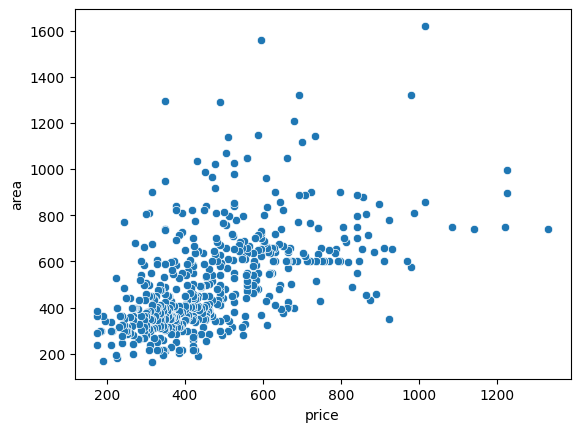

In [234]:
sns.scatterplot(data = df, x = 'price',y = 'area')

In [235]:
x = np.array(df['price'])
y = np.array(df['area'])
m = len(x)
fx= np.zeros(m)

In [236]:
def compute_output(x,w,b):
    for i in range(m):
        fx[i] = w * x[i] + b
    return fx


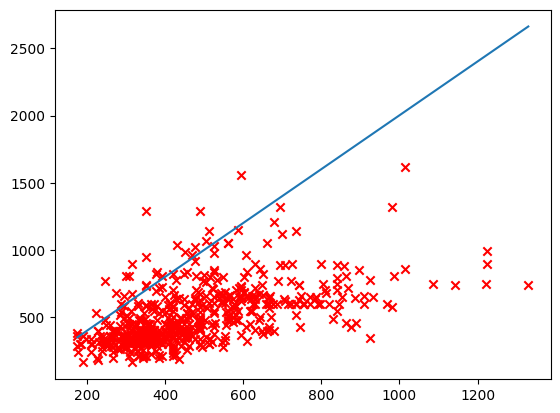

In [239]:
tmp_fx = compute_output(x, 2,2)
plt.plot(x, tmp_fx,label = 'prediction')
plt.scatter(x,y, marker='x', c='r',label='Actual Values')
